# ルンゲ・クッタ法の誤差

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('notebook', 'whitegrid', 'dark', font_scale=2, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

## オイラー法

$x'=f(t,x)$の初期値問題に対して漸化式
$$
    x_{n+1} = x_n + h f(t_n, x_n)
$$
によって近似解を計算する

In [2]:
def Euler(t, x, f, h):
    return x + h * f(t, x)

$x'=f(t,x)$の右辺の定義

In [3]:
def func(t,x):
    return x

$x'=x, x(0)=1$に対してオイラー法で$t=1$における近似解を計算し，真の解$x(1)=e$との誤差を調べる

In [4]:
x0 = 1.0 # 初期値
a = 0.0 # 初期時刻
b = 1.0 # 最終時刻
Steps = [2**n for n in range(4,17)]
H = [(b - a) / N for N in Steps]

In [5]:
# いろんな刻み幅でx(1)の近似を計算する
Err = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    x = x0
    for n in range(N):
        x = Euler(t, x, func, h)
        t = a + (n + 1) * h
    err = abs(x - np.exp(1))
    Err.append(err)

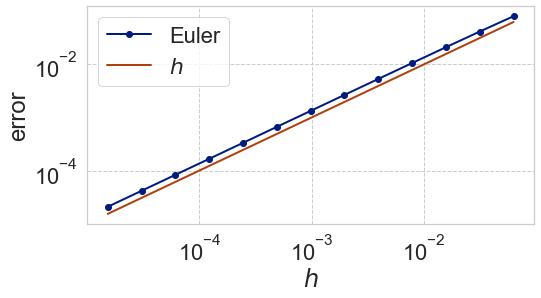

In [6]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$h$")
ax.set_ylabel("error")
ax.plot(H, Err, '-o', label="Euler")
ax.plot(H, H, '-', label="$h$")
ax.legend()

刻み幅$h$のときの誤差を$e_h$とおき，
$$
p_h := \log_2 \frac{e_{h}}{e_{2h}}
$$
を観察する．
1次精度なら$p_h$は$1$に近いはず．

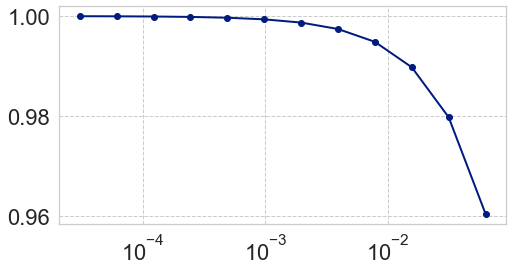

In [7]:
P1 = [np.log2(Err[k]/Err[k+1]) for k in range(0, len(Err)-1)]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.plot(H[0:-1], P1, '-ob')

## ホイン法

\begin{align}
    k_1 &= f(t_n, x_n),\\
    k_2 &= f(t_n + h, x_n + h k_1),\\
    x_{n+1} &= x_n + \frac{h}{2} (k_1 + k_2)
\end{align}

In [8]:
def Heun(t, x, f, h):
    k1 = f(t, x) 
    k2 = f(t + h, x + h * k1)
    return x + 0.5 * h * (k1 + k2)

In [9]:
Err2 = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    x = x0
    for n in range(N):
        x = Heun(t, x, func, h)
        t = a + (n + 1) * h
    err = abs(x - np.exp(1))
    Err2.append(err)

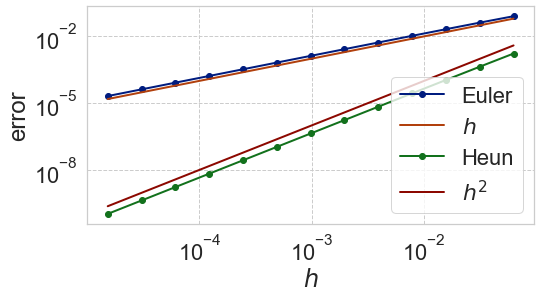

In [10]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$h$")
ax.set_ylabel("error")
ax.plot(H, Err, '-o', label="Euler")
ax.plot(H, H, '-', label="$h$")
ax.plot(H, Err2, '-o', label="Heun")
ax.plot(H, np.array(H)**2, '-', label="$h^2$")
ax.legend()

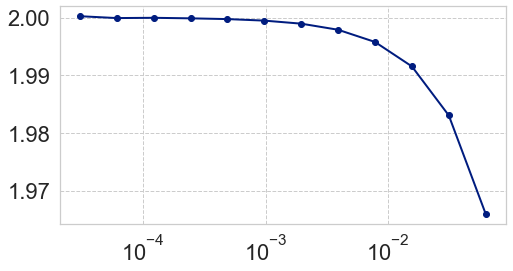

In [11]:
P2 = [np.log2(Err2[k]/Err2[k+1]) for k in range(0, len(Err)-1)]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.plot(H[0:-1], P2, '-ob')

## 古典的ルンゲ・クッタ法
$$
\begin{aligned}
k_1 &= f(t_n, x_n),\\
k_2 &= f(t_n + \tfrac{h}{2}, x_n + \tfrac{h}{2}k_1),\\
k_3 &= f(t_n + \tfrac{h}{2}, x_n + \tfrac{h}{2}k_2),\\
k_4 &= f(t_n + h, x_n + h k_3),\\
x_{n+1} &= x_n + \frac{h}{6}(k_1 + 2 k_2 + 2 k_3 + k_4)
\end{aligned}
$$

In [12]:
def RK4(t, x, f, h):
    k1 = f(t, x)
    k2 = f(t+0.5*h, x+0.5*h*k1)
    k3 = f(t+0.5*h, x+0.5*h*k2)
    k4 = f(t+h, x+h*k3)
    return x + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [13]:
Err3 = []
for n, N in enumerate(Steps):
    h = H[n]
    t = a
    x = x0
    for n in range(N):
        x = RK4(t, x, func, h)
        t = a + (n + 1) * h
    err = abs(x - np.exp(1))
    Err3.append(err)

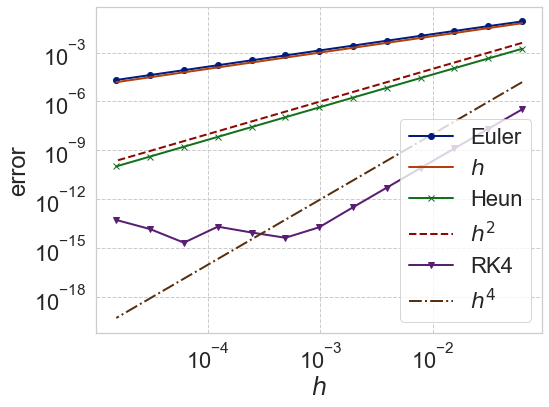

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$h$")
ax.set_ylabel("error")
ax.plot(H, Err, '-o', label="Euler")
ax.plot(H, H, '-', label="$h$")
ax.plot(H, Err2, '-x', label="Heun")
ax.plot(H, np.array(H)**2, '--', label="$h^2$")
ax.plot(H, Err3, '-v', label="RK4")
ax.plot(H, np.array(H)**4, '-.', label="$h^4$")
ax.legend()
# plt.savefig("rk_errors.pdf", bbox_inches='tight')

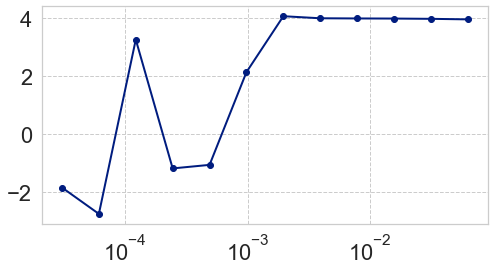

In [15]:
P3 = [np.log2(Err3[k]/Err3[k+1]) for k in range(0, len(Err3)-1)]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.plot(H[0:-1], P3, '-ob')